# Perkenalan
---

Nama : Muhammad Afif Alvan

Batch : FTDS-016-rmt

Assigment : Mailstone 2

## Description
---
Data ini berisikan hasil survey dari siswa menengah atas di portugal.

## Objective
---
Memprediksi nilai akhir siswa di mata pelajaran matematika di sekolah menengah atas di portugal.

# Import Libraries
---

In [817]:
# Processing
import pandas as pd 
import numpy as np

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Trining
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
# Modeling
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# Evaluasi
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Data Loading
---

In [818]:
# Creat Dataset
df = pd.read_csv('student-mat.csv')

In [819]:
# Display Head
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [820]:
# display tail
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


- Menampilkan display 5 data pertama dan 5 data terakhir


In [821]:
# Duplicate Dataset
df_duplicate = df.copy()

In [822]:
# Rename Columns
df.rename(columns={'G3': 'Final Grade'}, inplace= True)

- Mengganti nama kolom target untuk memudahkan visualisasi

In [823]:
# Info df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       395 non-null    object
 1   sex          395 non-null    object
 2   age          395 non-null    int64 
 3   address      395 non-null    object
 4   famsize      395 non-null    object
 5   Pstatus      395 non-null    object
 6   Medu         395 non-null    int64 
 7   Fedu         395 non-null    int64 
 8   Mjob         395 non-null    object
 9   Fjob         395 non-null    object
 10  reason       395 non-null    object
 11  guardian     395 non-null    object
 12  traveltime   395 non-null    int64 
 13  studytime    395 non-null    int64 
 14  failures     395 non-null    int64 
 15  schoolsup    395 non-null    object
 16  famsup       395 non-null    object
 17  paid         395 non-null    object
 18  activities   395 non-null    object
 19  nursery      395 non-null    

- Pada data set `student alcohol consumption` diketahui data ini memiliki `395 rows dan 32 kolom`. Dengan `16 int dan 17 object`

In [824]:
# describe df
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Analisis**

1. Siswa yang di survey memiliki rentang umur dari `15-22 tahun`
2. Konsumsi alcohol terbanyak setiap harinya berada pada level `high`
3. Study time paling lama selama lebih dari `10 jam`
4. Terdapat siswa yang memiliki nilai sempurna pada final grade
5. Terdapat siswa yang memiliki ketidakhadiran sebanyak `75 hari`
    

# Exploratory Data Analysis (EDA)

## Data Description



**Keterangan**

- school - student's school (binary: 'GP' -        Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output 
target)


## Feature Selection

C:\Users\User\AppData\Local\Temp\ipykernel_34952\2125313306.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin= -1, vmax=1, annot =True, fmt = '.2f', cmap='Blues' )


<AxesSubplot: title={'center': 'Correlation of Feature'}>

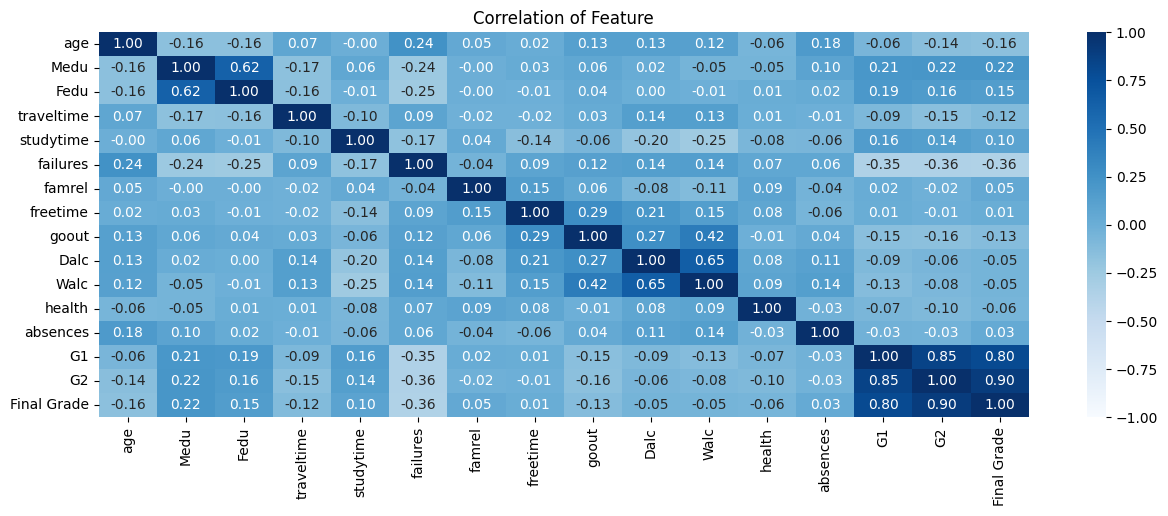

In [825]:
# Heatmap Correlation

plt.figure(figsize= (15,5))
plt.title('Correlation of Feature')
sns.heatmap(df.corr(), vmin= -1, vmax=1, annot =True, fmt = '.2f', cmap='Blues' )

- Berdasarkan `heatmap correlation` ditemukan bahwa `absences dan freetime` tidak memiliki korelasi yang tinggi terhadap target. Sehingga akan dihilangkan dalam pembuatan model untuk memprediksi nilai akhir siswa.


## Visualization

<AxesSubplot: title={'center': 'Barplot Final Grade vs Walc'}, xlabel='Final Grade', ylabel='Walc'>

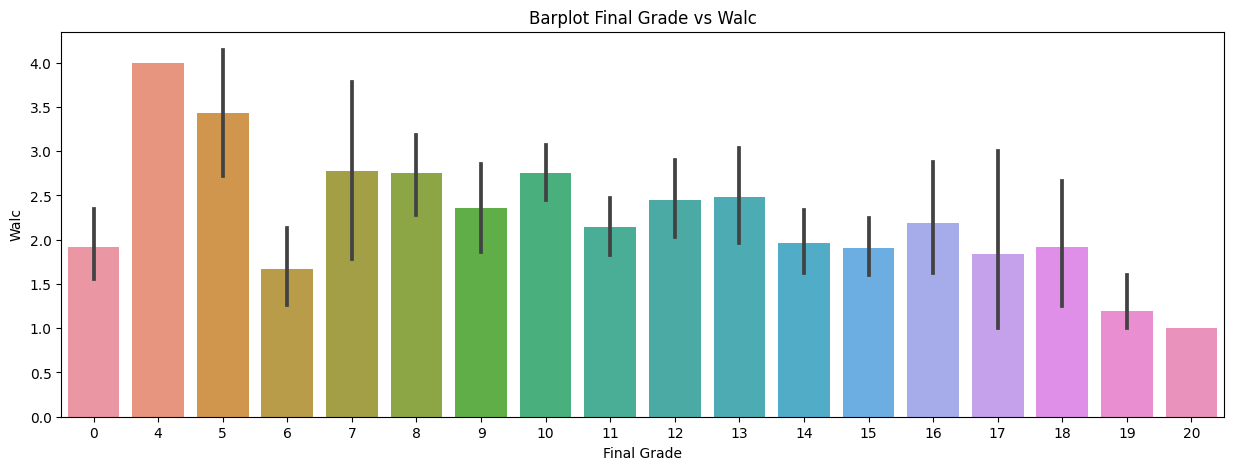

In [826]:
# Scatter plot
plt.figure(figsize=(15,5))
plt.title('Barplot Final Grade vs Walc')
sns.barplot(x=df['Final Grade'], y=df['Walc'], data = df)

- Sekilas dilihat bahwa konsumsi alcohol tiap minggunya tidak berpengaruh terhadap nilai siswa.

## Distribution Sex

Text(0.5, 1.0, 'Distribution Sex')

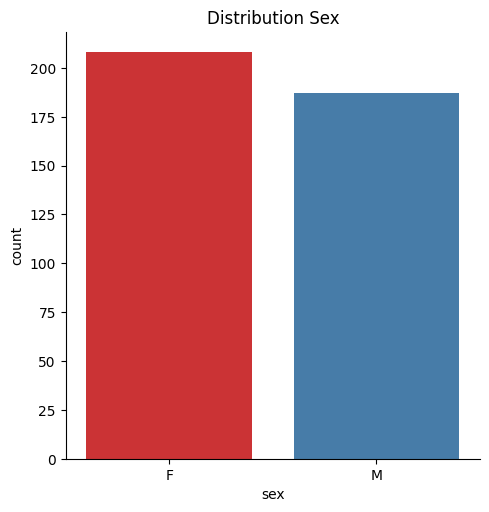

In [827]:
# Display Sex
sns.catplot(x='sex', kind='count', palette ='Set1', data = df)
plt.title('Distribution Sex')

- Dilihat pada dataset ini, siswa yang disurvei paling banyak adalah perempuan walaupun perbandingannya tidak terlalu signifikan

## Walc

Text(0.5, 0, 'Weekly alcohol consumption')

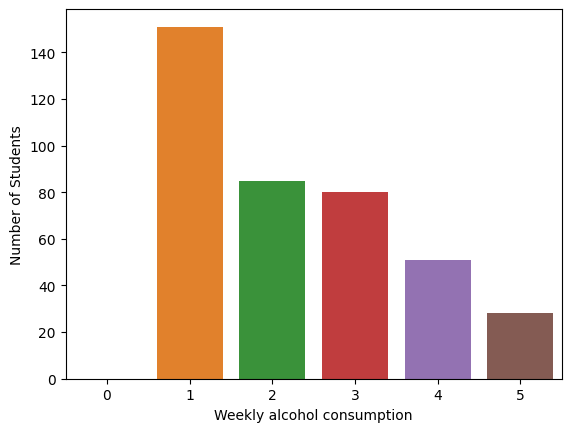

In [828]:
list = []
for i in range(6):
    list.append(len(df[df.Walc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

- dapat dilihat bahwa tidak terdapat siswa yang tidak mengkonsumsi alcohol ditiap minggunya. Rata-rata mereka mengkonsumsi alcohol pada nilai 1 yaitu very low

## Final Grade

<AxesSubplot: title={'center': 'Histogram of Price'}, xlabel='Final Grade', ylabel='Count'>

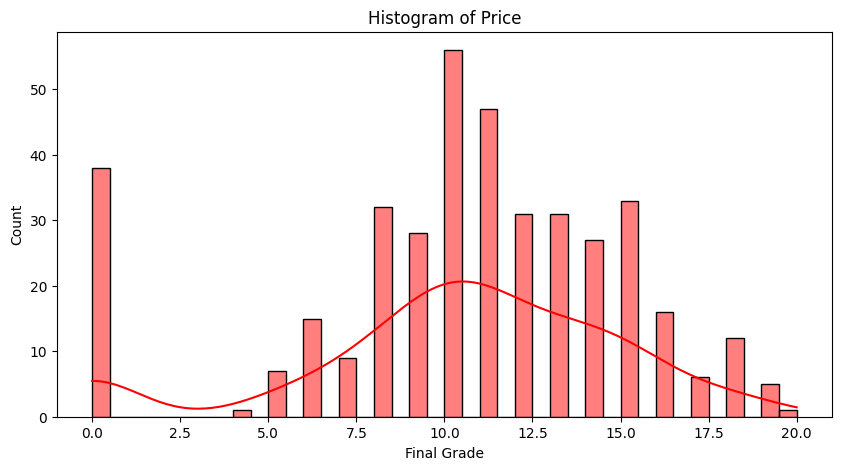

In [829]:
# Membuat histogram untuk price
plt.figure(figsize=(10,5))
plt.title('Histogram of Price')
sns.histplot(df['Final Grade'], kde= True, bins = 40, color='Red')

- Pada visualisasi ini terliht paling banyak siswa mendapatkan final grade dengan nilai 10. Serta tidak sedikit siswa yang mendapatkan nilai 0 pada dataset ini.

# Age vs Walc

<AxesSubplot: xlabel='age', ylabel='Walc'>

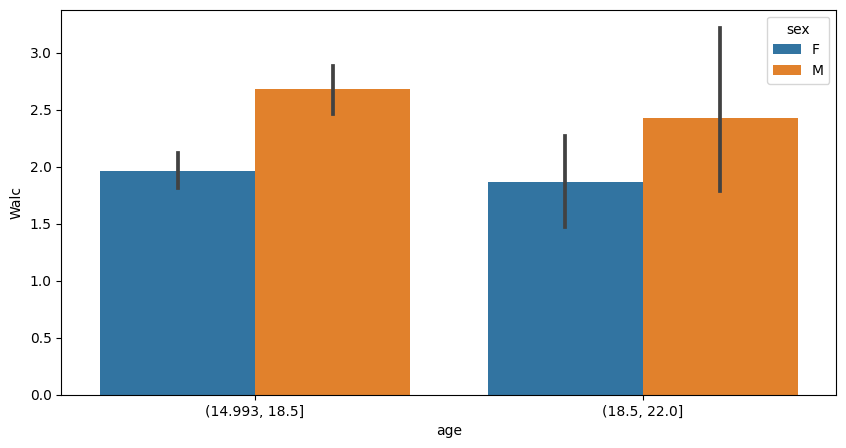

In [830]:
umur = pd.cut(df['age'], bins = 2)
 
plt.figure(figsize=(10,5))
sns.barplot(x = umur, y = df['Walc'], hue= df['sex'], data = df )

- Diketahui bahwa siswa laki laki dengan rentang umur 15-19 paling banyak mengkonsumsi alcohol setiap minggunya. Akan tetapi semakin dewasa yaitu direntang umur 18-22 konsumsi alcohol untuk laki laki berkurang, tidak dengan perempuan yang konsumsinya sama tiap minggu di rentang umur manapun

# Data Preprocessing

In [831]:
#Drop Colouns
df.drop(['absences','freetime'], axis = 1, inplace = True)

In [832]:
# Create Inference
# create inference data
df_inf = df.sample(20, random_state = 11)
df_inf.reset_index(drop = True, inplace = True)

In [833]:
#Membuang inferencec dari dataset
df_train_test = df.drop(df_inf.index)
df_train_test.reset_index(drop = True, inplace = True)
df_train_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,goout,Dalc,Walc,health,G1,G2,Final Grade
0,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,no,4,1,1,1,1,13,14,15
1,GP,M,15,U,GT3,T,4,4,health,health,...,yes,no,5,2,1,1,5,12,15,15
2,GP,M,16,U,LE3,T,4,2,teacher,other,...,yes,no,4,1,1,3,5,15,15,16
3,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,5,4,2,4,5,13,13,12
4,GP,F,15,R,GT3,T,2,4,services,health,...,yes,no,4,2,1,1,5,10,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,4,4,5,4,9,9,9
371,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,5,3,4,2,14,16,16
372,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,3,3,3,3,10,8,7
373,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,1,3,4,5,11,12,10


## Splitting Feature and Target

In [834]:
#Splitting dilakukan untuk menentukan features dan target
x = df_train_test.drop(['Final Grade'], axis= 1)
y = df_train_test['Final Grade']
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,goout,Dalc,Walc,health,G1,G2
0,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,yes,no,4,1,1,1,1,13,14
1,GP,M,15,U,GT3,T,4,4,health,health,...,yes,yes,no,5,2,1,1,5,12,15
2,GP,M,16,U,LE3,T,4,2,teacher,other,...,yes,yes,no,4,1,1,3,5,15,15
3,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,5,4,2,4,5,13,13
4,GP,F,15,R,GT3,T,2,4,services,health,...,yes,yes,no,4,2,1,1,5,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,4,4,5,4,9,9
371,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,5,3,4,2,14,16
372,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,3,3,3,3,10,8
373,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,1,3,4,5,11,12


In [835]:
#Split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =17)
print('Train Size : ', y_train.shape)
print('Test Size : ', y_test.shape)

Train Size :  (300,)
Test Size :  (75,)


## Handling Missing Value


In [836]:
x_train.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
goout         0
Dalc          0
Walc          0
health        0
G1            0
G2            0
dtype: int64

In [837]:
x_train.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
goout         0
Dalc          0
Walc          0
health        0
G1            0
G2            0
dtype: int64

In [838]:
y_train.isna().sum()

0

In [839]:
y_test.isna().sum()

0

- Setelah melakukan pengecekan missing value pada data yang ingin digunakan. Sudah tidak terdapat missing value pada data `train maupun test` dan `feature maupun target`

## Splitting Numerical and Catagorical

In [840]:
#Mendapatkan kolom numerik dan kategori

num_columns = x_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include =['object']).columns.tolist()
print(f'Numerical Columns: ', num_columns, '\n')
print(f'Categorical: ', cat_columns)

Numerical Columns:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2'] 

Categorical:  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [841]:
#Memisahkan train set dan test set pada kolom numeric dan categorical
x_train_num = x_train[num_columns]
x_test_num = x_test[num_columns]

x_train_cat = x_train[cat_columns]
x_test_cat = x_test[cat_columns]
x_train_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,G1,G2
231,16,3,3,3,2,0,5,3,1,3,2,7,10
217,16,2,1,1,1,0,4,2,1,1,5,13,12
341,18,1,1,2,2,1,4,3,2,3,5,13,12
255,17,2,2,2,2,0,4,4,2,3,5,12,12
29,15,4,4,1,2,1,4,4,1,1,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,18,4,3,1,2,0,3,2,1,3,2,17,18
313,18,2,2,1,2,0,4,3,1,1,2,8,8
143,17,1,3,1,1,0,5,3,1,4,2,10,10
241,18,4,3,1,2,0,4,2,1,1,3,8,8


## Feature Scaling

In [842]:
x_train_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,G1,G2
231,16,3,3,3,2,0,5,3,1,3,2,7,10
217,16,2,1,1,1,0,4,2,1,1,5,13,12
341,18,1,1,2,2,1,4,3,2,3,5,13,12
255,17,2,2,2,2,0,4,4,2,3,5,12,12
29,15,4,4,1,2,1,4,4,1,1,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,18,4,3,1,2,0,3,2,1,3,2,17,18
313,18,2,2,1,2,0,4,3,1,1,2,8,8
143,17,1,3,1,1,0,5,3,1,4,2,10,10
241,18,4,3,1,2,0,4,2,1,1,3,8,8


In [843]:
x_train_cat

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
231,GP,M,U,GT3,T,at_home,other,reputation,other,yes,yes,no,no,no,yes,yes,no
217,GP,F,U,GT3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,yes
341,MS,M,R,LE3,T,at_home,other,other,mother,no,no,no,yes,no,no,no,no
255,GP,F,U,LE3,T,services,other,course,mother,yes,yes,yes,no,yes,yes,yes,yes
29,GP,F,U,GT3,T,services,teacher,other,father,yes,yes,no,yes,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,GP,F,U,GT3,T,services,other,home,father,no,yes,yes,no,yes,yes,yes,yes
313,GP,F,U,LE3,T,other,other,home,other,no,no,no,yes,no,yes,yes,yes
143,GP,M,U,GT3,T,at_home,services,course,father,no,no,no,no,yes,no,yes,no
241,GP,M,U,GT3,T,teacher,other,course,mother,no,yes,yes,no,no,yes,yes,no


In [844]:

    #x_train_cat_lab = x_train_cat['famsize']
    #x_train_cat_oh = x_train_cat.drop(columns='famsize')
    #x_train_cat_lab

In [845]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
num_pipe = Pipeline(steps =[
    ('scaler', MinMaxScaler())
])
cat_pipe = Pipeline(steps=[
    ('Ordinal-enc', OrdinalEncoder())
])


In [846]:
num_pipe.fit_transform(x_train.select_dtypes(include='number'))
num_pipe.fit_transform(x_test.select_dtypes(include='number'))


array([[0.8       , 0.        , 0.25      , 0.        , 0.33333333,
        1.        , 0.5       , 0.25      , 0.        , 0.        ,
        1.        , 0.15384615, 0.44444444],
       [0.4       , 0.5       , 0.75      , 0.5       , 0.33333333,
        0.        , 0.75      , 0.5       , 0.        , 0.        ,
        0.5       , 0.46153846, 0.61111111],
       [0.        , 0.5       , 0.5       , 0.        , 1.        ,
        0.        , 1.        , 0.25      , 0.        , 0.        ,
        0.5       , 0.15384615, 0.44444444],
       [0.4       , 0.75      , 0.75      , 0.        , 0.        ,
        0.        , 0.75      , 0.5       , 0.        , 0.5       ,
        1.        , 0.69230769, 0.66666667],
       [0.        , 0.5       , 0.25      , 0.        , 0.33333333,
        0.        , 1.        , 0.25      , 0.        , 0.        ,
        1.        , 0.30769231, 0.5       ],
       [0.2       , 0.5       , 0.5       , 0.5       , 0.33333333,
        0.33333333, 0.5    

In [847]:
cat_pipe.fit_transform(x_train_cat)
cat_pipe.fit_transform(x_test_cat)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [848]:
from sklearn.compose import ColumnTransformer
full_processor_train = ColumnTransformer(transformers=[
    ('number', num_pipe, x_train.select_dtypes(include=['int64']).columns),
    ('catagery', cat_pipe, x_train.select_dtypes(include=['object']).columns)
])

In [849]:
full_processor_test = ColumnTransformer(transformers=[
    ('number', num_pipe, x_test.select_dtypes(include=['int64']).columns),
    ('catagery', cat_pipe, x_test.select_dtypes(include=['object']).columns)
])

In [850]:
x_train = full_processor_train.fit_transform(x_train)
x_test = full_processor_test.fit_transform(x_test)

In [851]:
x_train_final = pd.DataFrame(x_train, columns=[num_columns + cat_columns])
x_test_final = pd.DataFrame(x_test, columns=[num_columns + cat_columns])
x_train_final

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0.142857,0.75,0.75,0.666667,0.333333,0.000000,1.00,0.50,0.00,0.50,...,3.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.142857,0.50,0.25,0.000000,0.000000,0.000000,0.75,0.25,0.00,0.00,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.428571,0.25,0.25,0.333333,0.333333,0.333333,0.75,0.50,0.25,0.50,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.285714,0.50,0.50,0.333333,0.333333,0.000000,0.75,0.75,0.25,0.50,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.000000,1.00,1.00,0.000000,0.333333,0.333333,0.75,0.75,0.00,0.00,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.428571,1.00,0.75,0.000000,0.333333,0.000000,0.50,0.25,0.00,0.50,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
296,0.428571,0.50,0.50,0.000000,0.333333,0.000000,0.75,0.50,0.00,0.00,...,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
297,0.285714,0.25,0.75,0.000000,0.000000,0.000000,1.00,0.50,0.00,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
298,0.428571,1.00,0.75,0.000000,0.333333,0.000000,0.75,0.25,0.00,0.00,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


## Feature Selection

<AxesSubplot: xlabel='None', ylabel='None'>

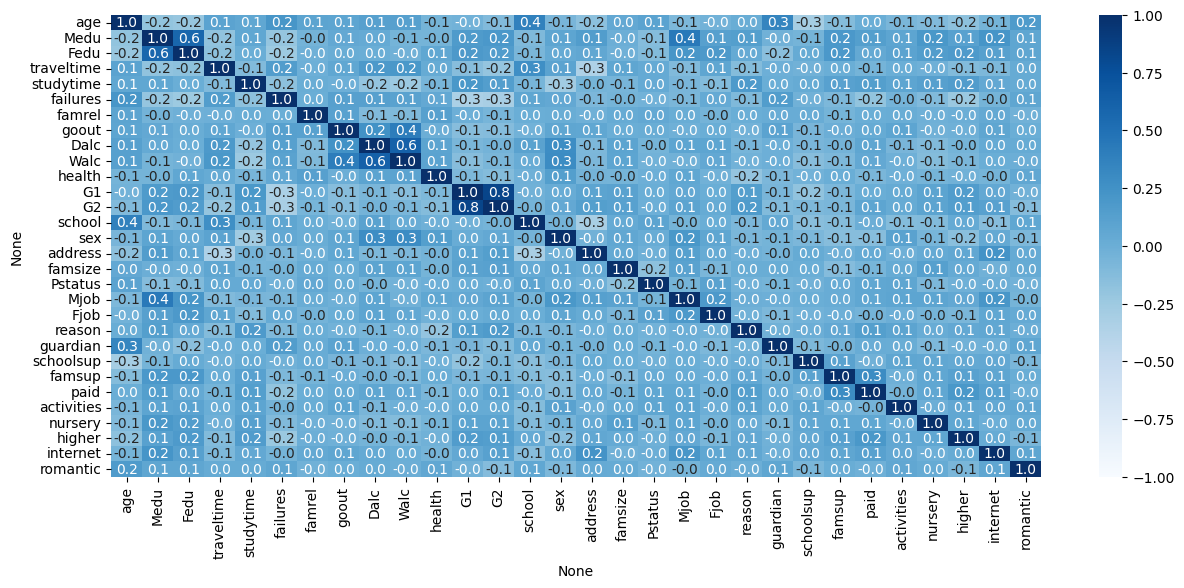

In [852]:
plt.figure(figsize=(15,6))
sns.heatmap(x_train_final.corr(), vmin= -1, vmax= 1, annot = True, fmt = '.1f', cmap='Blues' )

**Analisis**

Berikut adalah nama feature yang memiliki korelasi tinggi. Feature yang memiliki korelasi tinggi akan diambil salah satu agar tidak terjadi overfitting pada model. Feature tersebut sebagai berikut:

- Fedu dan Medu
- Dalc dan Walc
- G1 dan G2
- Mjob dan Medu
- Goout dan Walc

Dengan ini akan dilakukan penghapusan untuk feature `Fedu, Dalc, G1, Mjob, Goout`

In [853]:
x_train_final.drop(['Fedu','Dalc', 'G1','Mjob','goout'], axis =1, inplace= True)
x_test_final.drop(['Fedu','Dalc', 'G1','Mjob','goout'], axis=1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_34952\3872127270.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train_final.drop(['Fedu','Dalc', 'G1','Mjob','goout'], axis =1, inplace= True)
C:\Users\User\AppData\Local\Temp\ipykernel_34952\3872127270.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_test_final.drop(['Fedu','Dalc', 'G1','Mjob','goout'], axis=1, inplace = True)


In [854]:
x_test_final

,age,Medu,traveltime,studytime,failures,famrel,Walc,health,G2,school,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0.8,0.00,0.0,0.333333,1.000000,0.50,0.00,1.00,0.444444,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4,0.50,0.5,0.333333,0.000000,0.75,0.00,0.50,0.611111,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.50,0.0,1.000000,0.000000,1.00,0.00,0.50,0.444444,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.4,0.75,0.0,0.000000,0.000000,0.75,0.50,1.00,0.666667,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.50,0.0,0.333333,0.000000,1.00,0.00,1.00,0.500000,0.0,...,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.8,0.75,0.0,0.000000,1.000000,0.75,0.00,0.75,0.000000,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
71,0.6,0.75,0.0,0.333333,0.000000,0.75,0.25,0.00,0.833333,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
72,0.4,1.00,0.0,0.333333,0.000000,1.00,0.00,0.25,0.555556,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
73,0.0,1.00,0.5,0.333333,0.000000,0.75,0.00,1.00,0.888889,0.0,...,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


# Model Definition

## PipeLine

### Modeling Default

In [855]:
# Creat Pipeline Model
lr_pipe = Pipeline(steps=[('model_lr', LinearRegression())])
l1_pipe = Pipeline(steps=[('model_l1', Lasso())])
l2_pipe = Pipeline(steps=[('model_l2', Ridge())])
en_pipe = Pipeline(steps=[('model_en', ElasticNet())])
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('classifier', LogisticRegression())])
forest_pipe = Pipeline([('classifier', RandomForestRegressor())])


### Hyperparameter Tuning

In [856]:
lr_param = {
    'model_lr__n_jobs' : [1,2,3]
}

lasso_param = {
    'model_l1__alpha' : [0.0, 0.5, 1],
    'model_l1__max_iter' : [100,500,1000]
}

ridge_param = {
    'model_l2__alpha' : [0.5, 1, 2],
    'model_l2__max_iter' : [500,1000,1500],
    'model_l2__solver' :['auto', 'svd']
}

ElasticNet_param = {
    'model_en__alpha' : [1.5, 0.5, 1],
    'model_en__selection' : ['cyclic', 'random']
}

In [857]:
# Logistic Regression
logistic_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['liblinear', 'saga'],
                   'classifier__max_iter': [1000, 10000]}
forest_params = {'classifier__criterion': ['absolute_error', 'poisson'],
                 'classifier__max_features': ['sqrt', 'log2'],
                 'classifier__n_estimators': [200, 250, 300]}


# Model Training

## Pipeline

In [858]:
Linear = GridSearchCV(lr_pipe, param_grid= lr_param, cv=5, n_jobs =-1 )
Lasso = GridSearchCV(l1_pipe, param_grid= lasso_param, cv=5, n_jobs =-1 )
Ridge = GridSearchCV(l2_pipe, param_grid= ridge_param, cv=5, n_jobs =-1 )
ElasticNet= GridSearchCV(en_pipe, param_grid= ElasticNet_param, cv=5, n_jobs =-1 )

In [859]:
Linear.fit(x_train_final, y_train)
Lasso.fit(x_train_final, y_train)
Ridge.fit(x_train_final, y_train)
ElasticNet.fit(x_train_final, y_train)



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.184e+02, tolerance: 6.115e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model_en', ElasticNet())]),
             n_jobs=-1,
             param_grid={'model_en__alpha': [1.5, 0.5, 1],
                         'model_en__selection': ['cyclic', 'random']})

In [899]:
best_linear = Linear.best_estimator_
print('-------Linear Regression Best Hyperparameter-------')
print(Linear.best_params_)

best_lasso = Lasso.best_estimator_
print('\n-------Lasso Regression Best Hyperparameter-------')
print(Lasso.best_params_)

best_ridge = Ridge.best_estimator_
print('\n-------Ridge Regression Best Hyperparameter-------')
print(Ridge.best_params_)

best_en = ElasticNet.best_estimator_
print('\n-------Elastic Net Best Hyperparameter-------')
print(ElasticNet.best_params_)

best_logistic = Logistic.best_estimator_
print('\n-------Logistic Best Hyperparameter-------')
print(Logistic.best_params_)

best_forest = Forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(Forest.best_params_)


-------Linear Regression Best Hyperparameter-------
{'model_lr__n_jobs': 1}

-------Lasso Regression Best Hyperparameter-------
{'model_l1__alpha': 0.0, 'model_l1__max_iter': 1000}

-------Ridge Regression Best Hyperparameter-------
{'model_l2__alpha': 0.5, 'model_l2__max_iter': 500, 'model_l2__solver': 'svd'}

-------Elastic Net Best Hyperparameter-------
{'model_en__alpha': 0.5, 'model_en__selection': 'random'}

-------Logistic Best Hyperparameter-------
{'classifier__C': 100, 'classifier__max_iter': 10000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

-------Random Forest Best Hyperparameter-------
{'classifier__criterion': 'poisson', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300}


Didapatkan beberapa nilai dari masing masing best parameter untuk membantu model mendapatkan hasil yang terbaik

In [861]:
Linear_b = GridSearchCV(lr_pipe, param_grid= lr_param, cv=5, n_jobs =-1 )
Lasso_b = GridSearchCV(l1_pipe, param_grid= lasso_param, cv=5, n_jobs =-1 )
Ridge_b = GridSearchCV(l2_pipe, param_grid= ridge_param, cv=5, n_jobs =-1 )
ElasticNet_b = GridSearchCV(en_pipe, param_grid= ElasticNet_param, cv=5, n_jobs =-1 )
Logistic = GridSearchCV(logistic_pipe, param_grid= logistic_params, cv=5, n_jobs =-1 )
Forest = GridSearchCV(forest_pipe, param_grid = forest_params, cv = 5, n_jobs = -1)

In [862]:
Linear_b.fit(x_train_final, y_train)
Lasso_b.fit(x_train_final, y_train)
Ridge_b.fit(x_train_final, y_train)
ElasticNet_b.fit(x_train_final, y_train)
Logistic.fit(x_train_final, y_train)
Forest.fit(x_train_final, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.184e+02, tolerance: 6.115e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['absolute_error', 'poisson'],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [200, 250, 300]})

In [863]:
Linear_tuning = Linear_b.best_estimator_
Lasso_tuning = Linear_b.best_estimator_
Ridge_tuning = Linear_b.best_estimator_
ElasticNet_tuning = Linear_b.best_estimator_
Logistic_tuning = Logistic.best_estimator_
Forest_tuning= Forest.best_estimator_


# Model Evaluation

In [864]:
np.mean(y_train)

10.47

In [865]:
np.mean(y_test)

9.933333333333334

## Linear Regression

In [866]:
#Membuat predict
lr_y_pred_train = Linear_tuning.predict(x_train_final)
lr_y_pred_test = Linear_tuning.predict(x_test_final)
lr_y_pred_test

array([ 6.29334277, 11.26907255,  8.07932501, 13.10035584,  9.31904612,
        9.2127004 , 15.81356029,  9.47259287, 10.68735213,  8.69757905,
       16.70441683,  2.67424821,  6.72614375, 10.78654716,  3.10847276,
       16.26114032, 12.47319543, 17.30647853, 19.80149049, 10.10352024,
       12.45571411, 13.93090088, 13.63628725, 10.03915743, 11.9174086 ,
        5.83833443, 16.74572839,  6.32999484, 14.07835514,  6.60748432,
        9.91133544, 14.53069567, 19.87244112,  6.56090066, 13.88724411,
       12.20250073,  9.75857962,  7.26370225, 14.91439966, 14.8886862 ,
        5.68670948, 10.01384804,  3.71436329,  9.20672177,  7.14043645,
       13.81846322, 12.67056783,  9.18275389, 13.26371229,  5.53415918,
       10.91335839, -1.01226946,  9.88089393, 10.33303007, 12.85700289,
       13.43647157, 13.51483071, 13.34872287,  9.70260472,  3.93570017,
        7.88877843, 15.45335291, 14.08969518, 12.43631281,  5.25308249,
       -1.55346694, 11.33727422,  9.70746431, 12.99343072, 19.40

In [867]:
# Menggunakan MAE sebagai evaluasi model

from sklearn.metrics import mean_absolute_error

print('Error - Train Set: ', mean_absolute_error(y_train, lr_y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, lr_y_pred_test))

Error - Train Set:  1.137765689901232
Error - Test Set:  1.4254424895416014


## Lasso Regression(L1)

In [868]:
#Membuat predict
lasso_y_pred_train = Lasso_tuning.predict(x_train_final)
lasso_y_pred_test = Lasso_tuning.predict(x_test_final)
lasso_y_pred_test

array([ 6.29334277, 11.26907255,  8.07932501, 13.10035584,  9.31904612,
        9.2127004 , 15.81356029,  9.47259287, 10.68735213,  8.69757905,
       16.70441683,  2.67424821,  6.72614375, 10.78654716,  3.10847276,
       16.26114032, 12.47319543, 17.30647853, 19.80149049, 10.10352024,
       12.45571411, 13.93090088, 13.63628725, 10.03915743, 11.9174086 ,
        5.83833443, 16.74572839,  6.32999484, 14.07835514,  6.60748432,
        9.91133544, 14.53069567, 19.87244112,  6.56090066, 13.88724411,
       12.20250073,  9.75857962,  7.26370225, 14.91439966, 14.8886862 ,
        5.68670948, 10.01384804,  3.71436329,  9.20672177,  7.14043645,
       13.81846322, 12.67056783,  9.18275389, 13.26371229,  5.53415918,
       10.91335839, -1.01226946,  9.88089393, 10.33303007, 12.85700289,
       13.43647157, 13.51483071, 13.34872287,  9.70260472,  3.93570017,
        7.88877843, 15.45335291, 14.08969518, 12.43631281,  5.25308249,
       -1.55346694, 11.33727422,  9.70746431, 12.99343072, 19.40

In [869]:
# Menggunakan MAE sebagai evaluasi model

from sklearn.metrics import mean_absolute_error

print('Error - Train Set: ', mean_absolute_error(y_train, lasso_y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, lasso_y_pred_test))

Error - Train Set:  1.137765689901232
Error - Test Set:  1.4254424895416014


## Ridge Regression(L2)

In [870]:
#Membuat prediksi
ridge_y_pred_train = Ridge_tuning.predict(x_train_final)
ridge_y_pred_test = Ridge_tuning.predict(x_test_final)

ridge_y_pred_train

array([11.37745939, 11.62209967, 11.97490104, 12.17002154,  6.1047171 ,
       11.83682871, 10.5416987 ,  7.45280627, 15.18825057, 10.46152439,
        9.46582328,  8.70077845,  9.36641464,  5.97110728,  4.52111902,
       10.46795474, 12.11092205, 11.46036881,  8.01152362, 14.5230983 ,
       12.92181923, 13.19636891, 12.19215511, 10.97718681,  6.71912805,
        6.86037675,  7.88761653, 10.01812789,  9.57380361,  8.46130876,
        7.51075263, 13.39508984,  9.56000712,  5.0985231 , 15.39125058,
        8.74520473,  7.92739825,  7.8202763 ,  8.97576704, 11.94766843,
        7.17280025,  9.97308932,  8.72743418, 14.23824822, 15.76893755,
        7.11708005, 15.3360242 , 11.80979984,  9.0474504 ,  6.9390743 ,
        7.93352048,  9.89804787, 17.30636117, 15.04157319, 12.38160842,
        7.77054075, 18.23107947,  5.11933799,  0.15832326, 14.25423723,
       18.89755652, -1.30619559,  6.35863911, 13.67669036,  8.22519249,
        7.98368038,  8.85677578, 14.71156234,  9.45636716,  9.37

In [871]:
# Menggunakan MAE sebagai evaluasi model

from sklearn.metrics import mean_absolute_error

print('Error - Train Set: ', mean_absolute_error(y_train, ridge_y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, ridge_y_pred_test))

Error - Train Set:  1.137765689901232
Error - Test Set:  1.4254424895416014


## Elastic Net

In [872]:
#Membuat prediksi
en_y_pred_train = ElasticNet_tuning.predict(x_train_final)
en_y_pred_test = ElasticNet_tuning.predict(x_test_final)

en_y_pred_train

array([11.37745939, 11.62209967, 11.97490104, 12.17002154,  6.1047171 ,
       11.83682871, 10.5416987 ,  7.45280627, 15.18825057, 10.46152439,
        9.46582328,  8.70077845,  9.36641464,  5.97110728,  4.52111902,
       10.46795474, 12.11092205, 11.46036881,  8.01152362, 14.5230983 ,
       12.92181923, 13.19636891, 12.19215511, 10.97718681,  6.71912805,
        6.86037675,  7.88761653, 10.01812789,  9.57380361,  8.46130876,
        7.51075263, 13.39508984,  9.56000712,  5.0985231 , 15.39125058,
        8.74520473,  7.92739825,  7.8202763 ,  8.97576704, 11.94766843,
        7.17280025,  9.97308932,  8.72743418, 14.23824822, 15.76893755,
        7.11708005, 15.3360242 , 11.80979984,  9.0474504 ,  6.9390743 ,
        7.93352048,  9.89804787, 17.30636117, 15.04157319, 12.38160842,
        7.77054075, 18.23107947,  5.11933799,  0.15832326, 14.25423723,
       18.89755652, -1.30619559,  6.35863911, 13.67669036,  8.22519249,
        7.98368038,  8.85677578, 14.71156234,  9.45636716,  9.37

In [873]:
# Menggunakan MAE sebagai evaluasi model

from sklearn.metrics import mean_absolute_error

print('Error - Train Set: ', mean_absolute_error(y_train, en_y_pred_train))
print('Error - Test Set: ', mean_absolute_error(y_test, en_y_pred_test))

Error - Train Set:  1.137765689901232
Error - Test Set:  1.4254424895416014


## Logistic Regression

In [874]:
#Membuat prediksi
log_y_pred_train = Logistic_tuning.predict(x_train_final)
log_y_pred_test = Logistic_tuning.predict(x_test_final)

log_y_pred_train

array([10, 11, 10, 12,  7, 12, 11, 10, 15, 11, 10,  8, 10,  6,  0, 11, 13,
       10,  0, 14, 15, 14, 13, 11,  8,  9,  9, 10, 11, 10,  9, 13, 11,  9,
       15,  8,  9,  9, 10, 11,  8, 11, 11, 15, 14,  0, 16, 12, 10,  0,  8,
       11, 18, 14, 13,  9, 18,  5,  0, 14, 19,  0,  8, 13,  8, 10,  9, 15,
       10, 12, 14, 11,  0, 15, 15,  0, 17,  0,  0,  8, 11, 14, 11, 12, 15,
        4,  0, 17, 13, 16,  6, 10, 10, 11, 11,  7, 11,  8, 10, 14, 13, 10,
       12, 14, 13, 14, 10,  9, 10, 11, 15, 10, 11,  0, 11, 13, 10,  8, 12,
       16, 11, 10,  7, 16,  8, 10,  0, 10,  0, 15,  9,  7, 18, 19,  6, 13,
       13, 15,  0, 12, 10, 13, 11, 18, 13,  0, 14, 12,  0, 11,  0, 13, 10,
        6, 11, 11, 10, 14, 15, 13, 15, 13,  9,  6, 13, 11,  8,  8, 13, 10,
       15, 11,  7,  6, 11, 14,  0,  8, 11,  6, 12, 11, 19,  5, 10, 13, 10,
        0,  8, 13,  0,  8,  6,  9,  8, 10, 10, 13, 17,  7,  0, 11, 14,  0,
       10,  8, 16, 15,  9,  6,  8, 10, 16, 11, 10, 10, 11,  0, 10, 18,  7,
       12, 15,  9, 11, 13

# Random Forest

In [875]:
#Membuat prediksi
rf_y_pred_train = Forest_tuning.predict(x_train_final)
rf_y_pred_test = Forest_tuning.predict(x_test_final)

rf_y_pred_train

array([ 9.30991005, 11.88622222, 11.24222222, 11.63351852,  6.47428054,
       11.54956349, 10.63959524,  8.3482909 , 14.74222222, 10.77138889,
        9.3294127 ,  8.14151587,  9.54166667,  5.04205739,  3.66070015,
       10.95944444, 12.56638889, 11.75833333,  5.537841  , 13.45933333,
       11.49388889, 13.56255556, 11.32888889, 11.07388889,  7.97233005,
        8.11681448,  8.70111694,  9.78044444, 10.71916667,  7.79765201,
        8.12242979, 12.54548148, 11.04277778,  6.73341389, 14.73277778,
        9.16137118,  8.01858923,  8.52127417,  9.55666667, 11.315     ,
        7.26758849, 10.66033333, 10.67290693, 14.37611111, 13.83666667,
        6.94035017, 15.1574537 , 11.84005556,  9.64855556,  4.71377085,
        8.0884127 ,  9.2605    , 16.78833333, 14.47416667, 12.62111664,
        8.23727513, 16.50888889,  4.97283524,  4.01811021, 13.93405556,
       17.52222222,  4.7941837 ,  7.1083254 , 12.20533333,  8.02431295,
        9.6397803 ,  8.77689057, 14.74833333,  8.43777778,  9.79

# Model Evaluation

## MAE

In [876]:
mae = {}
final_score= {
    'Linear Regression': mean_absolute_error(y_train, lr_y_pred_train),
    'Lasso Regression' : mean_absolute_error(y_train, lasso_y_pred_train),
    'Ridge Regression' : mean_absolute_error(y_train, ridge_y_pred_train),
    'Elastic Net' : mean_absolute_error(y_train, en_y_pred_train),
    'Logistic Regression' : mean_absolute_error(y_train, log_y_pred_train),
    'Random Forest' : mean_absolute_error(y_train, rf_y_pred_train)
}
q={}
test_mae = {
    'Linear Regression': mean_absolute_error(y_test, lr_y_pred_test),
    'Lasso Regression' : mean_absolute_error(y_test, lasso_y_pred_test),
    'Ridge Regression' : mean_absolute_error(y_test, ridge_y_pred_test),
    'Elastic Net' : mean_absolute_error(y_test, en_y_pred_test),
    'Logistic Regression' : mean_absolute_error(y_test, log_y_pred_test),
    'Random Forest' : mean_absolute_error(y_test, rf_y_pred_test)
}
mae['Train MAE'] = final_score
i = pd.DataFrame(mae)

q['Test MAE'] = test_mae
q = pd.DataFrame(q)

## MSE

In [877]:
mse = {}
mse_score = {
    'Linear Regression': mean_squared_error(y_train, lr_y_pred_train),
    'Lasso Regression' : mean_squared_error(y_train, lasso_y_pred_train),
    'Ridge Regression' : mean_squared_error(y_train, ridge_y_pred_train),
    'Elastic Net' : mean_squared_error(y_train, en_y_pred_train),
    'Logistic Regression' : mean_squared_error(y_train, log_y_pred_train),
    'Random Forest' : mean_squared_error(y_train, rf_y_pred_train)
}
qq={}
test_mse = {
    'Linear Regression': mean_squared_error(y_test, lr_y_pred_test),
    'Lasso Regression' : mean_squared_error(y_test, lasso_y_pred_test),
    'Ridge Regression' : mean_squared_error(y_test, ridge_y_pred_test),
    'Elastic Net' : mean_squared_error(y_test, en_y_pred_test),
    'Logistic Regression' : mean_squared_error(y_test, log_y_pred_test),
    'Random Forest' : mean_squared_error(y_test, rf_y_pred_test)
}

mse['Train MSE'] = mse_score
ii = pd.DataFrame(mse)

qq['Test MSE'] = test_mse
qq = pd.DataFrame(qq)

## RMSE

In [878]:
rmse = {}
rmse_score = {
    'Linear Regression': np.sqrt(mean_squared_error(y_train, lr_y_pred_train)),
    'Lasso Regression' : np.sqrt(mean_squared_error(y_train, lasso_y_pred_train)),
    'Ridge Regression' : np.sqrt(mean_squared_error(y_train, ridge_y_pred_train)),
    'Elastic Net' : np.sqrt(mean_squared_error(y_train, en_y_pred_train)),
    'Logistic Regression' : np.sqrt(mean_squared_error(y_train, log_y_pred_train)),
    'Random Forest' : np.sqrt(mean_squared_error(y_train, rf_y_pred_train))
}
rmse['Nilai RMSE'] = rmse_score
z = pd.DataFrame(rmse)

zz={}
test_rmse = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test, lr_y_pred_test)),
    'Lasso Regression' : np.sqrt(mean_squared_error(y_test, lasso_y_pred_test)),
    'Ridge Regression' : np.sqrt(mean_squared_error(y_test, ridge_y_pred_test)),
    'Elastic Net' : np.sqrt(mean_squared_error(y_test, en_y_pred_test)),
    'Logistic Regression' : np.sqrt(mean_squared_error(y_test, log_y_pred_test)),
    'Random Forest' : np.sqrt(mean_squared_error(y_test, rf_y_pred_test))
}
zz['Test RMSE'] = test_rmse
zz = pd.DataFrame(zz)

### concat


In [879]:
hasil = pd.concat([i,q,ii,qq,z,zz], axis =1)
hasil.sort_values(by = 'Train MAE', ascending = True)

,Train MAE,Test MAE,Train MSE,Test MSE,Nilai RMSE,Test RMSE
Logistic Regression,0.476667,2.266667,2.103333,13.573333,1.450287,3.684201
Random Forest,0.854484,1.913736,2.096880,8.174475,1.448061,2.859104
Elastic Net,1.137766,1.425442,3.456020,4.912808,1.859037,2.216485
Lasso Regression,1.137766,1.425442,3.456020,4.912808,1.859037,2.216485
Linear Regression,1.137766,1.425442,3.456020,4.912808,1.859037,2.216485
Ridge Regression,1.137766,1.425442,3.456020,4.912808,1.859037,2.216485


**Analisis**

- MAE untuk melihat nilai jarak rata-rata dan prediksi error
- MSE untuk melihat nilai kesalahan pada proses prediksi
- RMSE untuk melihat seberapa jauh nilai yang diprediksi dengan nilai actual nya

Dengan ini saya simpulkan untuk model dan metric terbaik adalah dengan `random forest` dengan metric `MAE`. Dikarenakan rata-rata prediksi error yang kecil, kesalahan proses prediksi yang rendah dan nilai actual dengan prediksi tidak terlalu jauh.

# Model Saving

In [880]:
# menyimpan data
import joblib
import json

with open('model_lr.pkl', 'wb') as file_1:
  joblib.dump(lr_pipe, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(num_pipe, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(cat_pipe, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)
  
with open('model_l1.pkl', 'wb') as file_6:
  joblib.dump(l1_pipe, file_6)

with open('model_l2.pkl', 'wb') as file_7:
  joblib.dump(l2_pipe, file_7)

with open('model_en.pkl', 'wb') as file_8:
  joblib.dump(en_pipe, file_8)

with open('model_log.pkl', 'wb') as file_9:
  joblib.dump(Logistic, file_9)

with open('model_Forest.pkl', 'wb') as file_10:
  joblib.dump(Forest, file_10)

# Model Inference

In [881]:
# melihat data inference
df_inf.drop(['Fedu','Dalc', 'G1','Mjob','goout','school'], axis =1, inplace= True)
df_inf

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,activities,nursery,higher,internet,romantic,famrel,Walc,health,G2,Final Grade
0,M,17,U,LE3,T,4,other,course,mother,2,...,yes,yes,yes,yes,yes,2,4,5,12,12
1,F,19,R,GT3,T,2,other,course,mother,1,...,yes,no,yes,yes,no,5,2,5,5,0
2,F,18,U,LE3,T,3,services,course,mother,1,...,no,yes,yes,yes,no,4,1,1,9,8
3,M,18,U,GT3,T,4,services,home,mother,2,...,yes,yes,yes,yes,no,3,4,3,9,9
4,F,19,U,GT3,T,2,other,other,other,3,...,no,yes,no,yes,yes,3,1,2,12,13
5,M,16,U,GT3,T,3,services,course,father,1,...,no,yes,yes,yes,yes,4,4,5,12,12
6,F,17,U,LE3,T,4,other,reputation,father,1,...,yes,yes,yes,yes,yes,3,2,3,13,14
7,M,15,U,GT3,T,4,other,reputation,mother,1,...,no,yes,yes,yes,no,4,1,1,14,15
8,M,17,U,GT3,T,3,other,home,mother,1,...,no,yes,yes,yes,no,4,3,5,12,11
9,M,19,U,LE3,T,1,at_home,course,father,1,...,no,yes,yes,yes,no,3,3,5,9,9


In [882]:
asli = df_inf.copy()

In [883]:
num_columns = df_inf.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_inf.select_dtypes(include =['object']).columns.tolist()
print(f'Numerical Columns: ', num_columns, '\n')
print(f'Categorical: ', cat_columns)

Numerical Columns:  ['age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 'Walc', 'health', 'G2', 'Final Grade'] 

Categorical:  ['sex', 'address', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [884]:
#Splitting numeric and categorical
df_inf_num = df_inf[num_columns]
df_inf_cat = df_inf[cat_columns]

df_inf_num

,age,Medu,traveltime,studytime,failures,famrel,Walc,health,G2,Final Grade
0,17,4,2,2,0,2,4,5,12,12
1,19,2,1,3,1,5,2,5,5,0
2,18,3,1,2,0,4,1,1,9,8
3,18,4,2,1,0,3,4,3,9,9
4,19,2,3,2,0,3,1,2,12,13
5,16,3,1,2,1,4,4,5,12,12
6,17,4,1,2,0,3,2,3,13,14
7,15,4,1,2,0,4,1,1,14,15
8,17,3,1,1,0,4,3,5,12,11
9,19,1,1,1,0,3,3,5,9,9


In [885]:
num_pipe.fit_transform(df_inf_num.select_dtypes(include='number'))
cat_pipe.fit_transform(df_inf_cat.select_dtypes(include='object'))

array([[1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 2., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 2., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 1., 2., 2., 0., 1., 0., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 2., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 3., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 3., 1., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 2., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 3., 3., 1.

In [886]:
num_pipe.fit_transform(df_inf_num)
cat_pipe.fit_transform(df_inf_cat)

array([[1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 2., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 2., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 1., 2., 2., 0., 1., 0., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 2., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 3., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 3., 1., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 2., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 3., 3., 1.

In [887]:
from sklearn.compose import ColumnTransformer
full_processor_inf = ColumnTransformer(transformers=[
    ('number', num_pipe, df_inf_num.select_dtypes(include=['int64']).columns),
    ('catagery', cat_pipe, df_inf_cat.select_dtypes(include=['object']).columns)
])

In [888]:
df_inf = full_processor_inf.fit_transform(df_inf)

In [889]:
df_inf = pd.DataFrame(df_inf, columns=[num_columns + cat_columns])
df_inf

,age,Medu,traveltime,studytime,failures,famrel,Walc,health,G2,Final Grade,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0.50,1.000000,0.5,0.5,0.000000,0.000000,1.000000,1.00,0.857143,0.800000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.00,0.333333,0.0,1.0,0.333333,1.000000,0.333333,1.00,0.357143,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.75,0.666667,0.0,0.5,0.000000,0.666667,0.000000,0.00,0.642857,0.533333,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.75,1.000000,0.5,0.0,0.000000,0.333333,1.000000,0.50,0.642857,0.600000,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.00,0.333333,1.0,0.5,0.000000,0.333333,0.000000,0.25,0.857143,0.866667,...,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
5,0.25,0.666667,0.0,0.5,0.333333,0.666667,1.000000,1.00,0.857143,0.800000,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,0.50,1.000000,0.0,0.5,0.000000,0.333333,0.333333,0.50,0.928571,0.933333,...,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
7,0.00,1.000000,0.0,0.5,0.000000,0.666667,0.000000,0.00,1.000000,1.000000,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8,0.50,0.666667,0.0,0.0,0.000000,0.666667,0.666667,1.00,0.857143,0.733333,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9,1.00,0.000000,0.0,0.0,0.000000,0.333333,0.666667,1.00,0.642857,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [890]:
#Predict using Liniar Regression

y_pred_inf = Forest_tuning.predict(df_inf)
y_pred_inf= pd.DataFrame(y_pred_inf, columns=['Predict Final Grade'])
y_pred_inf

,Predict Final Grade
0,13.418651
1,6.353665
2,11.267889
3,11.068000
4,12.322207
5,13.343563
6,14.713333
7,16.406667
8,13.854444
9,11.583333


In [891]:
y_asli = asli['Final Grade']
y_asli = pd.DataFrame(asli['Final Grade'])
y_asli

,Final Grade
0,12
1,0
2,8
3,9
4,13
5,12
6,14
7,15
8,11
9,9


In [892]:
# Concate between Inference set dan rating prediction

pd.concat([y_asli, y_pred_inf], axis=1)

,Final Grade,Predict Final Grade
0,12,13.418651
1,0,6.353665
2,8,11.267889
3,9,11.068000
4,13,12.322207
5,12,13.343563
6,14,14.713333
7,15,16.406667
8,11,13.854444
9,9,11.583333


In [893]:
pd.concat([asli, y_pred_inf], axis =1)

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,Walc,health,G2,Final Grade,Predict Final Grade
0,M,17,U,LE3,T,4,other,course,mother,2,...,yes,yes,yes,yes,2,4,5,12,12,13.418651
1,F,19,R,GT3,T,2,other,course,mother,1,...,no,yes,yes,no,5,2,5,5,0,6.353665
2,F,18,U,LE3,T,3,services,course,mother,1,...,yes,yes,yes,no,4,1,1,9,8,11.267889
3,M,18,U,GT3,T,4,services,home,mother,2,...,yes,yes,yes,no,3,4,3,9,9,11.068000
4,F,19,U,GT3,T,2,other,other,other,3,...,yes,no,yes,yes,3,1,2,12,13,12.322207
5,M,16,U,GT3,T,3,services,course,father,1,...,yes,yes,yes,yes,4,4,5,12,12,13.343563
6,F,17,U,LE3,T,4,other,reputation,father,1,...,yes,yes,yes,yes,3,2,3,13,14,14.713333
7,M,15,U,GT3,T,4,other,reputation,mother,1,...,yes,yes,yes,no,4,1,1,14,15,16.406667
8,M,17,U,GT3,T,3,other,home,mother,1,...,yes,yes,yes,no,4,3,5,12,11,13.854444
9,M,19,U,LE3,T,1,at_home,course,father,1,...,yes,yes,yes,no,3,3,5,9,9,11.583333


- Model telah berhasil memprediksi nilai dari siswa yang ada pada data set, terlihat beberapa siswa terprediksi dengan benar dan yang lain berada diatas data aslinya.


In [894]:
print('MAE train = ', mean_absolute_error(y_asli, y_pred_inf))

MAE train =  2.7303355020563673


- Nilai mean absolute error yang dihasilkan dari oleh model random forest memiliki jaral rata-rata dari prediksi sebesar 2

In [895]:
print('MAE final = ', mean_absolute_error(y_asli, y_pred_inf))
print('MSE final = ', mean_squared_error(y_asli, y_pred_inf))
print('RMSE final = ', np.sqrt(mean_squared_error(y_asli, y_pred_inf)))


MAE final =  2.7303355020563673
MSE final =  12.009819990822935
RMSE final =  3.4655187188677736


**Analisis**

- Setelah dilakukan prediksi menggunakan `Random Forest` untuk memprediksi nilai setiap siswa yang berada pada data acak dari data asli. Dilakukan perhitungan menggunakan beberapa metric didapatkan hasil bahwa nilai `MAE = 2` yang memiliki artian jarak-rata-rata dari nilai asli dan prediksi adalah sebanyak 4. Sedangkan untuk nilai `MSE = 12` artinya model yang dibuat memliki kesalahan sebanyak jumlah MSE. 
- Nilai RMSE memiliki nilai 3 sehingga dapat dikatakan rentang antara nilai yang diprediksi dengan nilai actualnya

# Kesimpulan

Data set ini berisikan tentang survei dari beberapa siswa di beberapa sekolahan di portugal. Data ini berfokus pada background dari seorang siswa untuk melihat apakah konsumsi alcohol dapat mempengaruhi nilai siswa di mata pelajaran Matematika.

Diketahui jumlah sampel perempuan lebih banyak dari pada laki-laki.
Sekilas terlihat bahwa konsumsi alcohol tidak berpengaruh terhadap nilai final dari siswa. hal itu dikarenakan konsumsi alcohol tiap minggunya oleh rata-rata siswa adalah rendah. Terdapat beberapa siswa yang mendapatkan nilai 0 dan rata-ratanya mendapatkan nilai 10 dari nilai total 20. Bagi laki-laki semakin bertambahnya umur, konsumsi alcohol tiap minggunya semakin berubh.


Untuk tahapan awal dilakukan proses training model menggunakan beberapa algoritma untuk mecari algoritma terbaik dalam penentuan prediksi. Didapatkanlah bawha `Random Forest` merupakan algoritma yang cocok untuk memprediksi nilai siswa. Dilakukan Hyperparameter tuning untuk melihat paramater terbaik bagi model untuk memprediksi, Hasil dari tuning adalah `criterin=poission`, `max_features = sqrt` dan `n_estimators = 300` Karena telah dilakukan pengujian menggunakan beberapa metrics dan menghasilkan nilai sebagai berikut:

- Train MAE : 0.85
- Test MAE : 1.91
- Train MSE : 2.09
- Test MSE : 8.17
- Train RMSE : 1.44
- Test RMSE : 2.85

Nilai Mae memiliki arti bahwa jarak error untuk model memprediksi nilai adalah sebanyak 0.85 untuk data train dan 1.91 untuk data test. Sedangkan kesalahan yang di lakukan model random forest untuk memprediksi nilai siswa sebesar 2 point dan 8 point untuk data test. Kemampuan model dalam memprediksi dapat dilihat dengan RMSE dimana nilai yang tertera adalah nilai seberapa jauh nilai yang di prediksi dengan nilai actualnya, untuk data train berjaran 1.44 dan untuk test adalah 2.85.

Sehingga dapat disimpulkan bahwa pembuatan model menggunakan `Random Forest` adalah yang terbaik daripada yang lain untuk dataset ini. Model yang dibuat dapat memprediksi nilai siswa yang didasarkan oleh beberapa feature untuk pengujian model.

